In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv('Social_Network_Ads.csv')
print(data)

      User ID  Age  EstimatedSalary  Purchased
0    15624510   19            19000          0
1    15810944   35            20000          0
2    15668575   26            43000          0
3    15603246   27            57000          0
4    15804002   19            76000          0
..        ...  ...              ...        ...
395  15691863   46            41000          1
396  15706071   51            23000          1
397  15654296   50            20000          1
398  15755018   36            33000          0
399  15594041   49            36000          1

[400 rows x 4 columns]


In [34]:
X = data.iloc[:, [1,2]].values
Y = data.iloc[:, 3].values
print(X[:10])
print(Y[:10])

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]]
[0 0 0 0 0 0 0 1 0 0]


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

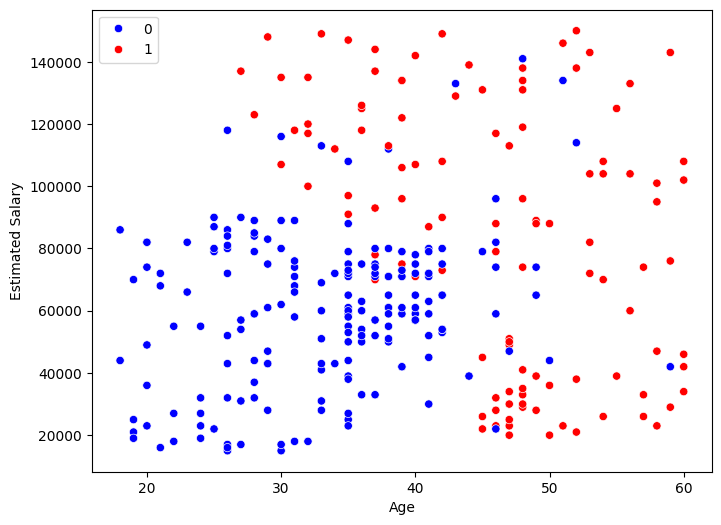

In [36]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x = X_train[:,0], y = X_train[:,1], hue=Y_train, palette={0:'blue', 1 :'red'}, marker='o')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")

plt.show()

Logistic Regression

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [38]:
print(X_train[:10])
print(X_test[:10])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]
[[-0.54748976  0.5130727 ]
 [ 0.15442019 -0.61825566]
 [-0.10879604  0.14615539]
 [-0.54748976  0.26846116]
 [-0.10879604 -0.61825566]
 [-0.81070599 -1.53554892]
 [-0.45975102 -1.68843113]
 [-0.0210573   2.25592989]
 [-1.60035469 -0.0678797 ]
 [ 0.94406888 -0.83229075]]


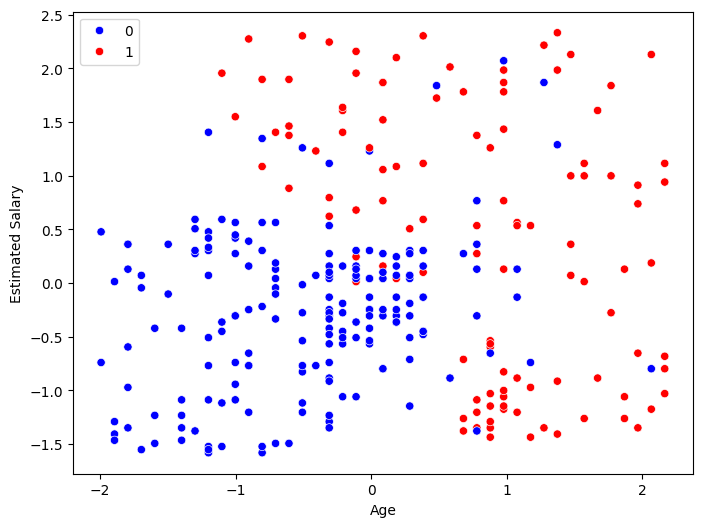

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = X_train[:,0], y = X_train[:,1], hue=Y_train, palette={0:'blue', 1 :'red'}, marker='o')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")

plt.show()

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [42]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 87.0%


In [43]:
print(f"Coefficients: {classifier.coef_}")
print(f"Intercept: {classifier.intercept_}")

Coefficients: [[2.07665837 1.11008221]]
Intercept: [-0.95217247]


p = 2.07665837 * age + 1.11008221 * estimated_salary - 0.95217247 = 0

1.11008221 * y = -2.07665837 * x + 0.95217247

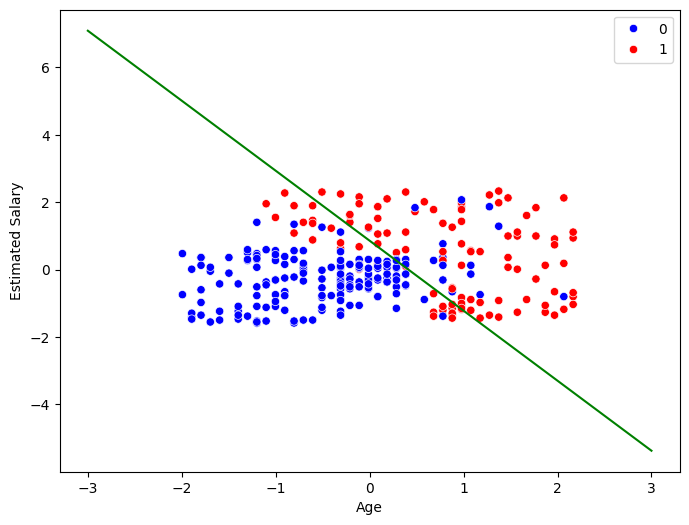

In [44]:
plt.figure(figsize=(8,6))
x1 = np.linspace(-3, 3, 100)
x2 =  -2.07665837 * x1 + 0.95217247 / (1.11008221)
plt.plot(x1, x2, color='green')

sns.scatterplot(x = X_train[:,0], y = X_train[:,1], hue=Y_train, palette={0:'blue', 1 :'red'}, marker='o')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")

plt.show()

KNN (k-Nearest-Neighbours)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)


In [46]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [47]:
y_pred = knn.predict(X_test)
print(f"Test Accuracy (k = 5): {accuracy_score(Y_test, y_pred) * 100}%")

Test Accuracy (k = 5): 93.0%


In [48]:
# Plotting
x1_vals = np.linspace(-3, 3, 400)
x2_vals = np.linspace(-3, 3, 400)
x1, x2 = np.meshgrid(x1_vals, x2_vals)

In [49]:
Z = knn.predict(np.c_[x1.ravel(), x2.ravel()])
Z = Z.reshape(x1.shape)

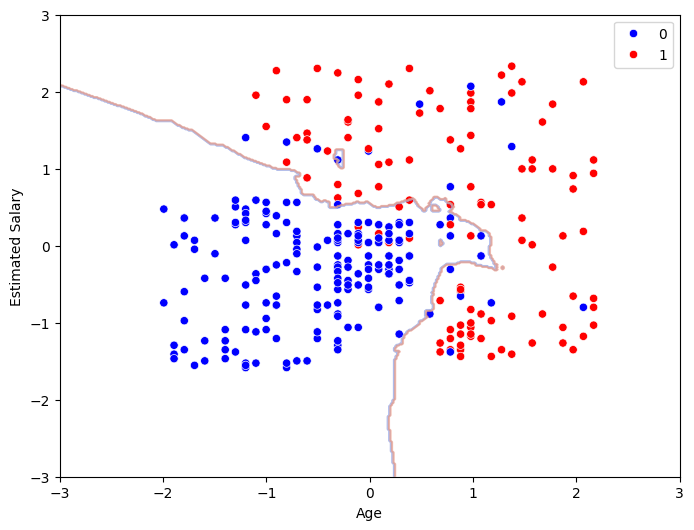

In [50]:
plt.figure(figsize=(8,6))

plt.contour(x1, x2, Z, cmap=plt.cm.coolwarm, alpha=0.3)

sns.scatterplot(x = X_train[:,0], y = X_train[:,1], hue=Y_train, palette={0:'blue', 1 :'red'}, marker='o')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")

plt.show()

SVM (Linear)

In [51]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel='linear', random_state=0)
classifier_svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [52]:
y_pred = classifier_svc.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 88.00%


/tmp/ipython-input-3949755977.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


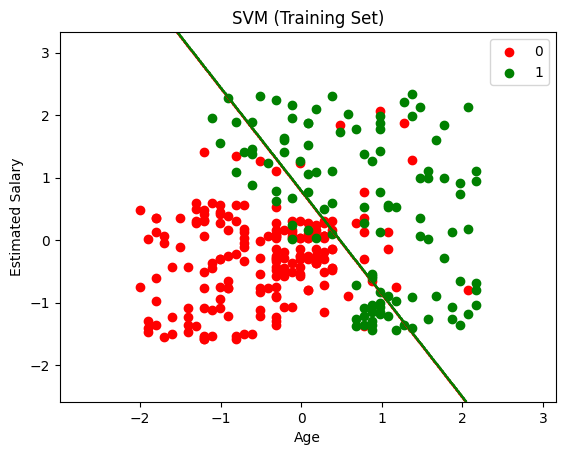

In [53]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:,0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:,1].max() + 1, step=0.01))

plt.contour(X1, X2, classifier_svc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('SVM (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [54]:
print(f'Coefficients: {classifier_svc.coef_}')
print(f"Intercept: {classifier_svc.intercept_}")

Coefficients: [[1.60291291 0.97138722]]
Intercept: [-0.76862169]


SVM (RBF kernel)

In [55]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel='rbf', random_state=0)
classifier_rbf.fit(X_train, Y_train)

SVC(random_state=0)

In [56]:
y_pred = classifier_rbf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 93.00%


/tmp/ipython-input-3824846634.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


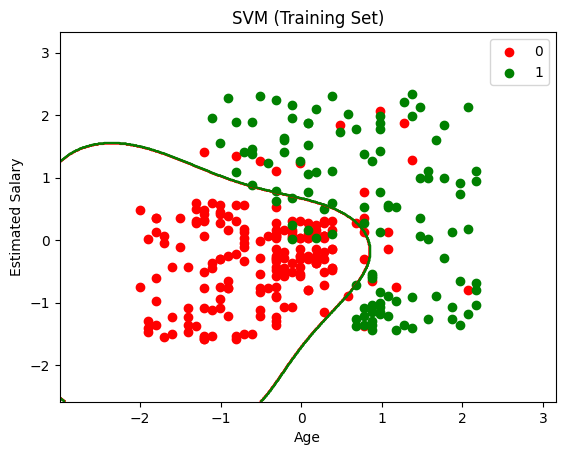

In [57]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:,0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:,1].max() + 1, step=0.01))

plt.contour(X1, X2, classifier_rbf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('SVM (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [58]:
print(f'Coefficients: {classifier_rbf.dual_coef_}')
print(f"Intercept: {classifier_rbf.intercept_}")

Coefficients: [[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -0.39538374 -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -0.78991358 -1.         -0.52256413 -0.31065453
  -1.         -1.         -1.         -1.         -1.         -0.55676178
  -1.         -1.         -1.         -1.         -0.18843385 -1.
  -0.13744116 -1.          1.          1.          1.          1.
   1.          0.45617399  1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          0.41555922  0.10054384
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          0.6074976   0.32077706
   1.          1.          1.          0.40483608  1.          1.
   0.59576497  1.          1. 

In [59]:
weights = classifier_svc.coef_
bias = classifier_svc.intercept_

In [62]:
with open("svm_model.h", "w") as f:
  f.write(f"#define NUM_CLASSES {weights.shape[0]}\n")
  f.write(f"#define NUM_FEATURES {weights.shape[1]}\n\n")

  f.write("float weights[NUM_CLASSES][NUM_FEATURES] = {\n")
  for row in weights:
    f.write("   {" + ", ".join(f"{v:.10f}" for v in row) + "},\n")
  f.write("};\n\n")

  f.write("float bias[NUM_CLASSES] = {" + ", ".join(f"{b:.10f}" for b in bias) + "};\n")

print("Exported SVM Model to svm_model.h")

Exported SVM Model to svm_model.h


In [63]:
mean = sc.mean_
scale = sc.scale_

with open("scaler.h", "w") as f:
  f.write(f"#define NUM_FEATURES {len(mean)}\n\n")

  f.write("float mean[NUM_FEATURES] = {\n")
  f.write("   " + ", ".join(f"{m:.10f}" for m in mean) + "\n};\n\n")

  f.write("float scale[NUM_FEATURES] = {\n")
  f.write("   " + ", ".join(f"{s:.10f}" for s in scale) + "\n};\n\n")

print("Exported scalar parameters to scaler.h")

Exported scalar parameters to scaler.h
